In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor, ExtraTreesRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge, SGDRegressor, HuberRegressor, PassiveAggressiveRegressor, TheilSenRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("/kaggle/input/blinkit-sales-dataset/blinkit_products.csv")
data.head(5)

,product_id,product_name,category,brand,price,mrp,margin_percentage,shelf_life_days,min_stock_level,max_stock_level
0,153019,Onions,Fruits & Vegetables,Aurora LLC,947.95,1263.93,25.0,3,13,88
1,11422,Potatoes,Fruits & Vegetables,Ramaswamy-Tata,127.16,169.55,25.0,3,20,65
2,669378,Potatoes,Fruits & Vegetables,Chadha and Sons,212.14,282.85,25.0,3,23,70
3,848226,Tomatoes,Fruits & Vegetables,Barad and Sons,209.59,279.45,25.0,3,10,51
4,890623,Onions,Fruits & Vegetables,"Sangha, Nagar and Varty",354.52,472.69,25.0,3,27,55


In [3]:
data=data.drop("product_id",axis=1)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268 entries, 0 to 267
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   product_name       268 non-null    object 
 1   category           268 non-null    object 
 2   brand              268 non-null    object 
 3   price              268 non-null    float64
 4   mrp                268 non-null    float64
 5   margin_percentage  268 non-null    float64
 6   shelf_life_days    268 non-null    int64  
 7   min_stock_level    268 non-null    int64  
 8   max_stock_level    268 non-null    int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 19.0+ KB


In [5]:
data.describe()

,price,mrp,margin_percentage,shelf_life_days,min_stock_level,max_stock_level
count,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000
mean,488.356828,680.434739,27.779851,231.757463,20.388060,74.753731
std,298.487200,419.772224,7.458753,151.205830,5.958546,14.591535
min,12.320000,17.600000,15.000000,3.000000,10.000000,50.000000
25%,226.717500,325.150000,20.000000,90.000000,15.000000,63.750000
50%,442.185000,616.970000,30.000000,365.000000,21.000000,73.000000
75%,779.445000,1056.620000,35.000000,365.000000,25.250000,88.000000
max,995.980000,1633.320000,40.000000,365.000000,30.000000,100.000000


In [6]:
data.isnull().sum()

product_name         0
category             0
brand                0
price                0
mrp                  0
margin_percentage    0
shelf_life_days      0
min_stock_level      0
max_stock_level      0
dtype: int64

In [7]:
data.duplicated().sum()

0

In [8]:
le=LabelEncoder()
data["product_name"]=le.fit_transform(data["product_name"])
data["category"]=le.fit_transform(data["category"])
data["brand"]=le.fit_transform(data["brand"])

In [9]:
data.corr()

,product_name,category,brand,price,mrp,margin_percentage,shelf_life_days,min_stock_level,max_stock_level
product_name,1.000000,0.214646,-0.040371,-0.040890,-0.062661,-0.171362,0.318521,0.000102,-0.036628
category,0.214646,1.000000,-0.063333,-0.037938,0.017706,0.344581,0.264315,0.028164,-0.014915
brand,-0.040371,-0.063333,1.000000,-0.059217,-0.061999,-0.036675,-0.051104,-0.010178,-0.164690
price,-0.040890,-0.037938,-0.059217,1.000000,0.982195,-0.062633,-0.058469,-0.040858,-0.006327
mrp,-0.062661,0.017706,-0.061999,0.982195,1.000000,0.097916,-0.043183,-0.054902,-0.015554
margin_percentage,-0.171362,0.344581,-0.036675,-0.062633,0.097916,1.000000,0.009517,-0.047959,-0.058727
shelf_life_days,0.318521,0.264315,-0.051104,-0.058469,-0.043183,0.009517,1.000000,0.041920,-0.003718
min_stock_level,0.000102,0.028164,-0.010178,-0.040858,-0.054902,-0.047959,0.041920,1.000000,0.131067
max_stock_level,-0.036628,-0.014915,-0.164690,-0.006327,-0.015554,-0.058727,-0.003718,0.131067,1.000000


# Feature Engineering

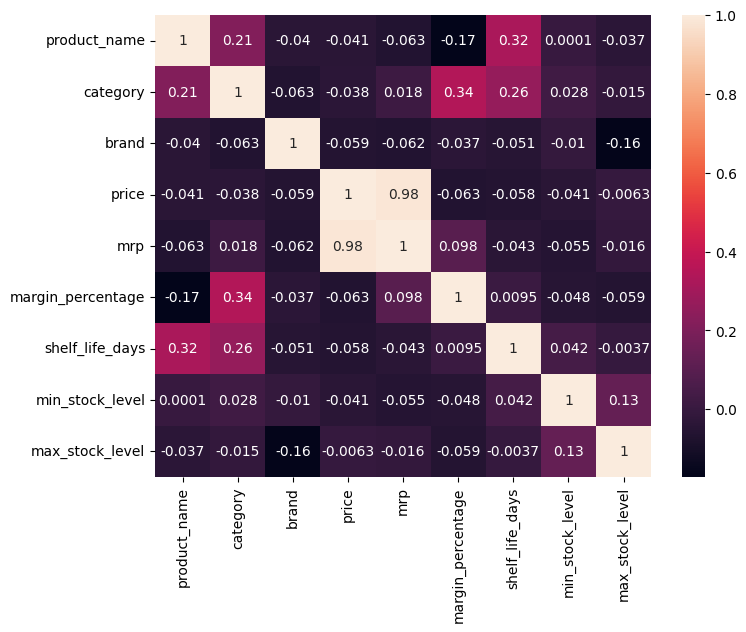

In [10]:
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(),annot=True)
plt.show()

# Models

In [11]:
models = {
    "Random Forest Regressor": RandomForestRegressor(),
    "Gradient Boosting Regressor": GradientBoostingRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor(),
    "Bagging Regressor": BaggingRegressor(),
    "Extra Trees Regressor": ExtraTreesRegressor(),
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "ElasticNet Regression": ElasticNet(),
    "Bayesian Ridge Regression": BayesianRidge(),
    "SGD Regressor": SGDRegressor(),
    "Huber Regressor": HuberRegressor(),
    "Passive Aggressive Regressor": PassiveAggressiveRegressor(),
    "TheilSen Regressor": TheilSenRegressor(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "K-Nearest Neighbors Regressor": KNeighborsRegressor(),
}

In [12]:
x=data.drop(["price"],axis=1)
y=data["price"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)

# Results

In [13]:
metrics = {
    'Model': [],
    'Accuracy': []
}
for name,model in models.items():
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    acc = r2_score(y_test, y_pred)
    metrics['Model'].append(name)
    metrics['Accuracy'].append(acc * 100)
    print(f"Model: {name}")
    print(f"Accuracy: {acc*100}")
    print("-" * 30)

Model: Random Forest Regressor
Accuracy: 98.73732348697179
------------------------------
Model: Gradient Boosting Regressor
Accuracy: 99.61114534969573
------------------------------
Model: AdaBoost Regressor
Accuracy: 97.65584517309514
------------------------------
Model: Bagging Regressor
Accuracy: 98.46388281718144
------------------------------
Model: Extra Trees Regressor
Accuracy: 99.73460496274132
------------------------------
Model: Linear Regression
Accuracy: 98.76917560006193
------------------------------
Model: Ridge Regression
Accuracy: 98.79659089771961
------------------------------
Model: Lasso Regression
Accuracy: 98.82443235290334
------------------------------
Model: ElasticNet Regression
Accuracy: 88.87727248443161
------------------------------
Model: Bayesian Ridge Regression
Accuracy: 98.77137100830944
------------------------------
Model: SGD Regressor
Accuracy: 98.76970518734963
------------------------------
Model: Huber Regressor
Accuracy: 98.7144179704100

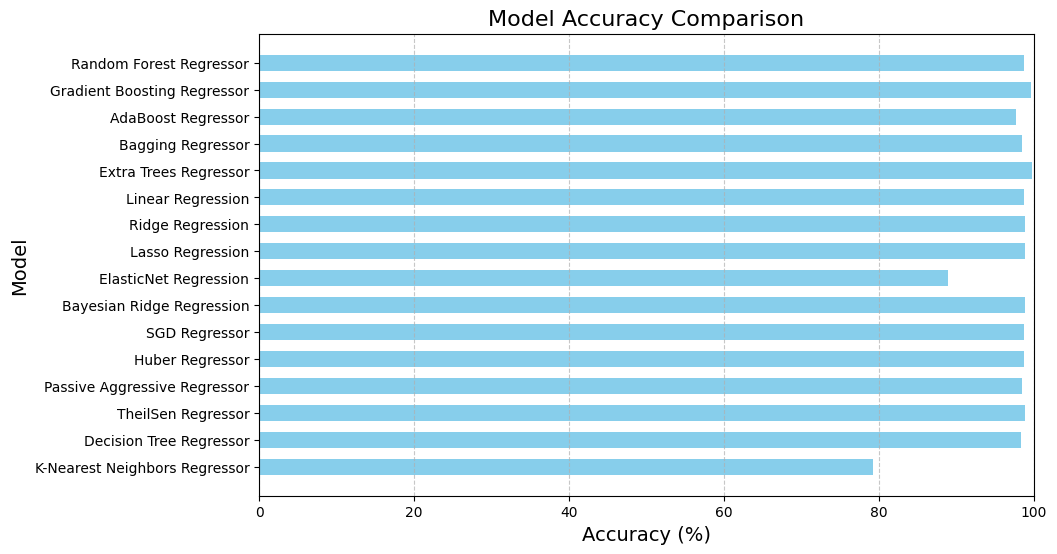

In [14]:
metrics_df = pd.DataFrame(metrics)
plt.figure(figsize=(10, 6))
plt.barh(metrics_df['Model'], metrics_df['Accuracy'], color='skyblue', height=0.6) 
plt.title('Model Accuracy Comparison', fontsize=16)
plt.xlabel('Accuracy (%)', fontsize=14)
plt.ylabel('Model', fontsize=14)
plt.xlim(0, 100)  
plt.grid(axis='x', linestyle='--', alpha=0.7) 
plt.gca().invert_yaxis() 
plt.show()

# If you like my work , dont forget to UPVOTE it !